# Traffic Safety Data Analysis Using Python

#### this analysis is intended to:
-  visualize time-series data
-  do exploratory data analysis
-  use linear regression for prediction
-  compare predicted and actual outcomes

In [2]:
# load all necessary libraries

import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# set plot theme and palette
sns.set_theme()
sns.set_palette('bright')

## Traffic data exploration

### 1. Inspect the traffic safety dataset

In [3]:
# load dataset using pandas & save it as `traffic`
traffic = pd.read_csv('traffic.csv')

# inspect first few rows
traffic.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


### 2. Inspect and format data types

The `traffic` data frame contains three columns: `Date`, `Crashes_per_100k`, and `Season`. 
To plot the `Crashes_per_100k` column as a time series, the `Date` column should be in date format.

In [4]:
# inspect data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              180 non-null    object 
 1   Crashes_per_100k  180 non-null    float64
 2   Season            180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


The `traffic` dataframe consists of 3 columns and 180 rows, no missing data.
The number of crashes is normalized to the annual population per 100,000 people.


Converting the `Date` column to the date datatype since Python does not yet recognize it as a datetime variable.

In [5]:
# convert Date to date format
traffic['Date'] = pd.to_datetime(traffic['Date'])

# inspect data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


The `pd.to_datetime()` function converts a character string object to the `datetime64[ns]` datatype. This later can be used to plot a time series of data points.

### 3. Visualize traffic safety data

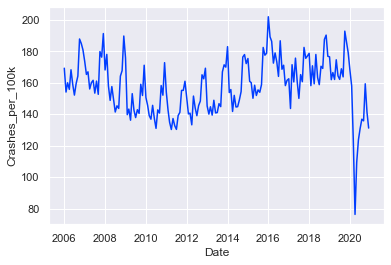

In [6]:
# create line plot of the traffic data
sns.lineplot(x = 'Date', y = 'Crashes_per_100k', data = traffic)
plt.show()

The line plot of the collision data shows the decreasing trend in crash rates from 2006 continuing until 2010 or 2011.The crash rates begin increasing afterwards. The data for 2020 is very different from the preceding years.
    
There also appear to be cyclical patterns, which may indicate differing crash rates by season.


### 4. Visualize seasonal rates

Since we saw a fair amount of variance in the number of collisions occurring throughout the year, we might hypothesize that the number of collisions increases or decreases during different seasons. We can visually explore this with a box plot. 

Use `sns.boxplot()` with crash rate on the x-axis and season on the y-axis. Remove the anomolous 2020 data by adjusting the `data` parameter to `traffic[traffic.Date.dt.year != 2020]`.

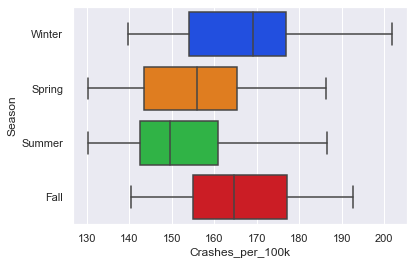

In [8]:
# create box plot by season, 'x-axis = crash rate' and `y axis = season` and remove the anomolous 2020 data
sns.boxplot(x = 'Crashes_per_100k', y = 'Season', data = traffic[traffic.Date.dt.year != 2020])
plt.show()

Winter and Fall appear to have generally higher crash rates than Spring and Summer. 
Could seasons be the reason for the pattern in crash rates?

## Smartphone data exploration

### 5. Inspect the smartphone use dataset

The dataset `crashes_smartphones.csv` contains smartphone data from Pew Research Center matched to normalized crash rates from the `traffic` data frame for the years 2011 to 2019.

The variables of the dataset:

* `Month_Year`: a shortened date with only the month and year of the survey
* `Crashes_per_100k`: the normalized crash rate matching the month and year of the smartphone usage survey
* `Season`: Winter, Spring, Summer, or Fall
* `Smartphone_Survey_Date`: the actual date the smartphone usage survey was conducted
* `Smartphone_usage`: the percent of survey participants that owned and used a smartphone


In [9]:
# import dataset
smartphones = pd.read_csv('crashes_smartphones.csv')

# inspect first few rows
smartphones.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,4/3/12,46
1,Apr-15,150.077792,Spring,4/12/15,67
2,Apr-16,172.401948,Spring,4/4/16,72
3,Aug-12,145.403147,Summer,8/5/12,44
4,Dec-12,169.160811,Winter,12/9/12,45


### 6. Format date data type

In [10]:
# convert the `Smartphone_Survey_Date` to datetime object
smartphones['Smartphone_Survey_Date'] = pd.to_datetime(smartphones['Smartphone_Survey_Date'])

# inspect data types
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              28 non-null     object        
 1   Crashes_per_100k        28 non-null     float64       
 2   Season                  28 non-null     object        
 3   Smartphone_Survey_Date  28 non-null     datetime64[ns]
 4   Smartphone_usage        28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


Smartphone Usage Rates has less data than the Crash Rates/
The `smartphones` dataframe consists of 5 columns and 28 rows. 

No missing data in this dataset.

### 7. Visualize smartphone use data
Inspect the smartphone use over time. 

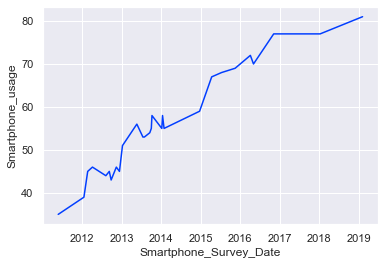

In [11]:
# create line plot of the `smartphones` data with `x-axis = Smartphone_Survey_Date` and `the y-axis = Smartphone_usage`
sns.lineplot(x = 'Smartphone_Survey_Date', y = 'Smartphone_usage', data = smartphones)
plt.show()

The data shows an increase of Smartphone Usage over time.

## Relationship exploration

### 8. Visualize crash rate by smartphone use
Create a scatter plot with smartphone usage on one axis and crash rates on the other axis to see whether there is a relationship between these two variables. 

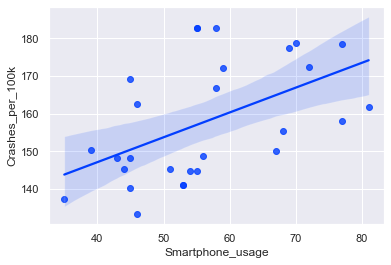

In [12]:
# create scatter plot with regression line
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)
plt.show()

There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.


### 9. Check the correlation coefficient

To test whether the correlation between `Smartphone_usage` and `Crashes_per_100k` is statistically significant, we can calculate the Pearson's _r_ correlation coefficient and the associated _p_-value. 

The `corr, p = pearsonr(column1, column2)` on the `Smartphone_usage` and `Crashes_per_100k` columns in the `smartphones` dataframe. 

In [13]:
# find Pearson's r and p-value
corr, p = pearsonr(smartphones.Smartphone_usage, smartphones.Crashes_per_100k)

# print corr and p to see the results
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

Pearson's r = 0.513
p =  0.005


The Pearson's r correlation coefficient is > 0.5, which indicates a moderately strong positive relationship.

On the other hand, the  p-value is less than 0.05. 

Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. 

Note: correlation does not mean causation, as the saying goes. Many other factors may be contributing to the rise in car crash rates from 2011 to 2019. 


## Analysis

### 10. Run a linear regression
Linear regression can be used to predict crash rates based on smart phone usage. First, regress crash rates on smartphone usage. Then, predict the crash rate in 2020 and see if it matches the actual crash rate in 2020.

In [14]:
# convert columns to arrays
X = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

In [15]:
# initiate the linear regression model to the variable 'lm'
lm = LinearRegression()

# fit the model and run the regression
lm.fit(X, y)

LinearRegression()

### 11. Print and interpret regression coefficients

In [16]:
# print the coefficients 
print("Coefficients: \n",lm.intercept_, lm.coef_)

Coefficients: 
 [120.6637106] [[0.66103316]]


The generic equation for a line is `y = b + (m * x)`, where `b` = value where the the line intercepts the y-axis and `m` = the slope of the line. 

In this case, the two coefficients of our linear model, `b = 120.6637` and `m = 0.6610`.

So the equation for our linear model is `y = 120.6637 + (0.6610 * x)` and we can use this equation to predict new values of y from any new value of x.
    
We can also interpret the slope of 0.6610: every additional percentage point of smartphone usage is associated with an additional 0.6610 crashes per 100,000 people.

### 12. Make a prediction

Assume smartphone usage in 2020 is the same with 2019. This is a reasonable asssumption since the increase in smartphone usage that we observed in our plot started to plateau at the end of the time series. Let's use this approximation and our regression model to predict the crash rate in 2020.

From the model output, the regression line equation is `Crashes_per_100k = 120.6637 + (0.6610 * Smartphone_usage)`. 

In [17]:
# get the smartphone usage rate from 2019
smartphones[smartphones['Month_Year'] == "Feb-19"].Smartphone_usage

7    81
Name: Smartphone_usage, dtype: int64

In [18]:
# predict the crash rate in 2020 using the regression equation
120.664 + (0.661 * 81)

174.205

If the smartphone usage rate was the same in 2020 as in 2019 (81%), this model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.  

### 13. Compare to the actual rate

How good was this prediction? 

In [19]:
# get the actual crash rate in Feb 2020
traffic[traffic['Date'] == pd.to_datetime("2020-02-01")].Crashes_per_100k

169    157.88955
Name: Crashes_per_100k, dtype: float64

The actual crash rate in Februrary of 2020 was only 157.8895, a bit lower than our prediction. 

### 14. Visualize the prediction

Plot the regression plot again, adding two new points on top:

* The predicted 2020 crash rate
* The actual 2020 crash rate

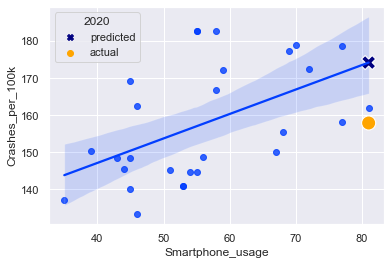

In [20]:
# recreate the regression plot we made earlier
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)


# add a scatter plot layer to show the actual and predicted 2020 values
sns.scatterplot(x = [81,81], y = [174.205,157.890], 
                hue = ['predicted','actual'], style= ['predicted','actual'], 
                markers = ['X','o'], palette=['navy','orange'], s=200)

# add legend title
plt.legend(title='2020')
plt.show()

The addition of another layer to this regression plot shows us the difference between the predicted and real crash rates in February 2020. We can see how these values compare to the rest of the dataset. 
